## Import necessary libraries

In [232]:
# generic libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)

# visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from termcolor import colored, cprint

# for statistical models
from scipy import stats

# for scaling feature fluctuations
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# for label encoding the categorical features
from sklearn.preprocessing import LabelEncoder

# for OLS, VIF and R-Square Calculation
import statsmodels.api as sm

# for multicolinearity check
from sklearn.decomposition import PCA

# for train test split data
from sklearn.model_selection import train_test_split

# import regression metrics libraries
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve

# import regreassion models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# for cross validation
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

## import train data and see basic infos

In [2]:
raw_data = pd.read_csv('Railofy_training_data_for_model.csv')

In [3]:
raw_data.shape

(36775, 25)

In [4]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
pk,36775.0,9.779557e+10,1.642729e+11,2.119454e+10,2.807045e+10,6.400895e+10,8.450154e+10,8.831011e+11
GRCA,36775.0,2.111787e+00,1.620523e+00,8.189685e-03,4.913811e-01,1.965524e+00,3.513375e+00,5.000000e+00
CCA,36775.0,2.316864e+00,1.586308e+00,7.590947e-03,9.234182e-01,2.061221e+00,3.656655e+00,5.000000e+00
JD,36775.0,8.669273e-01,4.964743e-01,1.708441e-02,4.544452e-01,7.722151e-01,1.294144e+00,3.542452e+00
ODD,36775.0,7.836196e-01,2.435820e-01,1.218324e-02,6.451104e-01,8.804411e-01,9.970030e-01,1.020475e+00
JS,36775.0,7.653929e-01,5.174971e-01,4.433955e-02,3.990560e-01,6.650933e-01,9.754701e-01,3.547164e+00
ODS,36775.0,6.894013e-01,2.435523e-01,1.298701e-02,5.185185e-01,7.500000e-01,9.047619e-01,9.876543e-01
SL,36775.0,8.746431e-01,3.311277e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
NDTD,36775.0,2.737148e-02,2.745667e-02,0.000000e+00,8.318239e-03,1.666618e-02,3.604837e-02,1.277945e-01
CURP,36775.0,4.462030e-01,4.113701e-01,6.341150e-04,2.542373e-01,3.750000e-01,5.000000e-01,3.000000e+00


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36775 entries, 0 to 36774
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pk      36775 non-null  int64  
 1   QT      36775 non-null  object 
 2   GRCA    36775 non-null  float64
 3   CCA     36775 non-null  float64
 4   JD      36775 non-null  float64
 5   ODD     36775 non-null  float64
 6   JS      36775 non-null  float64
 7   ODS     36775 non-null  float64
 8   SL      36775 non-null  int64  
 9   NDTD    36775 non-null  float64
 10  CURP    36775 non-null  float64
 11  GROP    36775 non-null  float64
 12  CANP    36775 non-null  float64
 13  SBRA    36775 non-null  float64
 14  SCRA    36775 non-null  float64
 15  GRA     36775 non-null  float64
 16  CURA    36775 non-null  float64
 17  RPW     36775 non-null  float64
 18  CUCA    36775 non-null  float64
 19  CAR     36775 non-null  float64
 20  BKT_2   36775 non-null  int64  
 21  CL_1    36775 non-null  int64  
 22

In [8]:
raw_data.target.value_counts(), raw_data.target.value_counts(normalize=True)

(0    25197
 1    11578
 Name: target, dtype: int64,
 0    0.685167
 1    0.314833
 Name: target, dtype: float64)

In [10]:
raw_data.head()

,pk,QT,GRCA,CCA,JD,ODD,JS,ODS,SL,NDTD,CURP,GROP,CANP,SBRA,SCRA,GRA,CURA,RPW,CUCA,CAR,BKT_2,CL_1,CL_2,CL_3,target
0,88315053602,GN,1.400436,0.610522,0.667146,0.930870,0.709433,0.800000,1,0.016290,0.204678,0.409357,0.167464,1.000539,0.919474,1.341754,1.820791,0.280196,-0.007556,1.091054,0,0,1,0,0
1,88315053603,GN,1.400436,0.610522,0.667146,0.930870,0.709433,0.800000,1,0.024623,0.216374,0.409357,0.157895,1.000539,0.919474,1.999409,3.810137,0.276128,-0.007556,1.143376,0,0,1,0,0
2,88314793081,GN,0.728882,0.524062,1.365898,0.885873,1.463205,0.767442,0,0.004357,0.089888,0.101124,0.010204,0.196907,0.003487,0.618700,0.742814,0.278101,0.435419,5.000000,0,0,0,0,0
3,88312760631,GN,5.000000,5.000000,0.298977,0.764192,0.354716,0.800000,0,0.003798,0.314147,0.328710,0.010960,0.678897,0.148338,1.117669,1.079367,0.266220,0.091167,5.000000,1,0,0,0,1
4,88312449843,GN,0.614226,0.389327,0.699606,0.917133,1.108489,0.862069,1,0.024571,0.253333,0.560000,0.227723,1.621770,2.129082,4.393867,5.000000,0.277710,2.103696,1.454895,1,0,1,0,0


## Split numeric and categorical features

In [14]:
raw_data_numeric_fe = raw_data.select_dtypes(exclude=['object'])
raw_data_categorical_fe = raw_data.select_dtypes(include=['object'])

num_columns = raw_data_numeric_fe.columns.values.tolist()
cat_columns = raw_data_categorical_fe.columns.values.tolist()

In [15]:
num_columns

['pk',
 'GRCA',
 'CCA',
 'JD',
 'ODD',
 'JS',
 'ODS',
 'SL',
 'NDTD',
 'CURP',
 'GROP',
 'CANP',
 'SBRA',
 'SCRA',
 'GRA',
 'CURA',
 'RPW',
 'CUCA',
 'CAR',
 'BKT_2',
 'CL_1',
 'CL_2',
 'CL_3',
 'target']

In [16]:
cat_columns

['QT']

## Check for outliers in Numeric columns

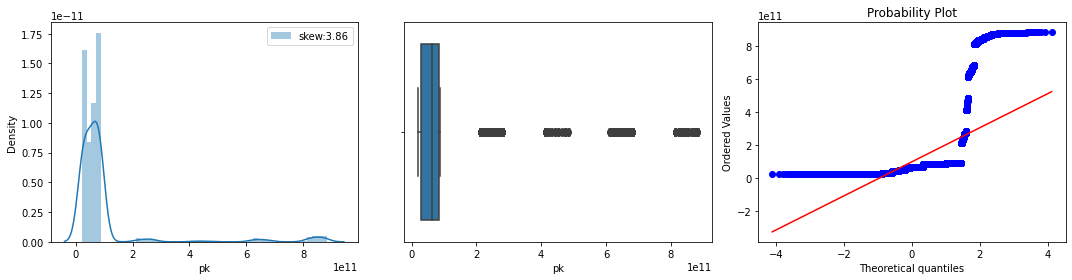

0.01    2.127968e+10
0.02    2.139050e+10
0.03    2.140773e+10
0.04    2.224540e+10
0.25    2.807045e+10
0.50    6.400895e+10
0.90    8.824979e+10
0.95    4.750089e+11
0.96    6.552921e+11
0.97    8.142555e+11
0.98    8.439412e+11
0.99    8.642375e+11
1.00    8.831011e+11
Name: pk, dtype: float64


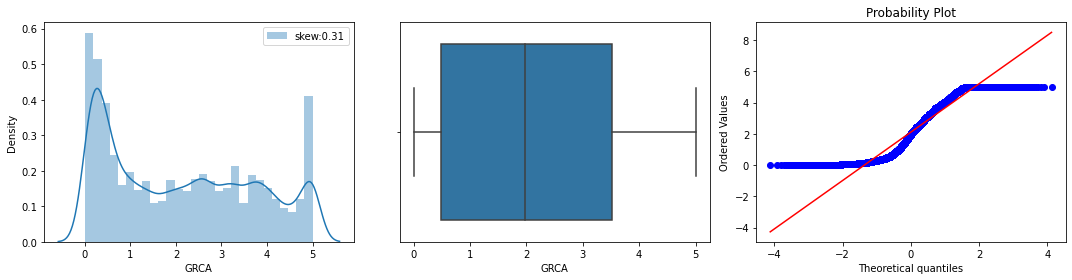

0.01    0.032759
0.02    0.040948
0.03    0.049138
0.04    0.065517
0.25    0.491381
0.50    1.965524
0.90    4.569844
0.95    5.000000
0.96    5.000000
0.97    5.000000
0.98    5.000000
0.99    5.000000
1.00    5.000000
Name: GRCA, dtype: float64


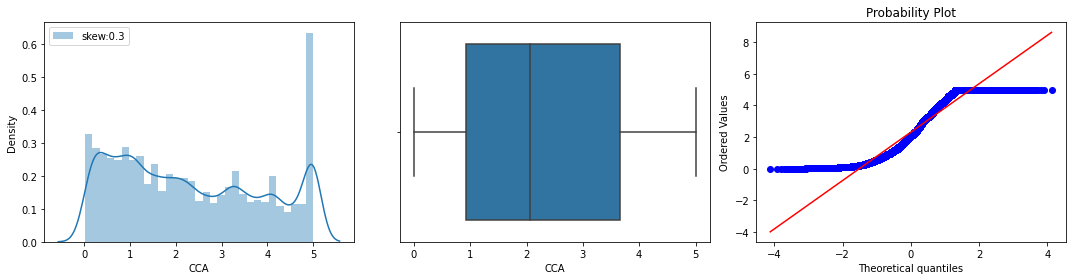

0.01    0.054697
0.02    0.092663
0.03    0.118644
0.04    0.140969
0.25    0.923418
0.50    2.061221
0.90    4.888155
0.95    5.000000
0.96    5.000000
0.97    5.000000
0.98    5.000000
0.99    5.000000
1.00    5.000000
Name: CCA, dtype: float64


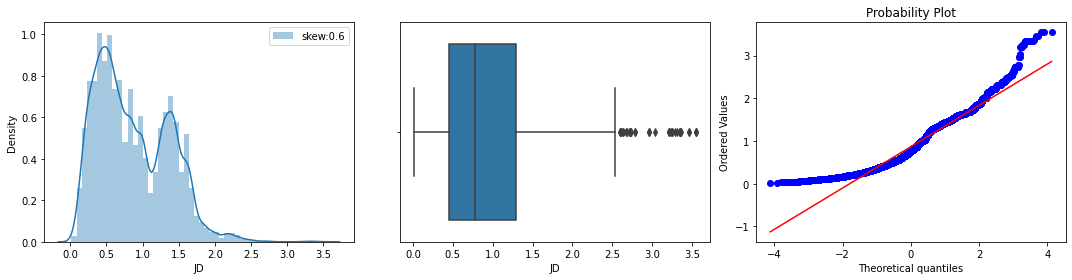

0.01    0.128987
0.02    0.158031
0.03    0.181095
0.04    0.199033
0.25    0.454445
0.50    0.772215
0.90    1.551264
0.95    1.681106
0.96    1.710149
0.97    1.787883
0.98    1.923807
0.99    2.162032
1.00    3.542452
Name: JD, dtype: float64


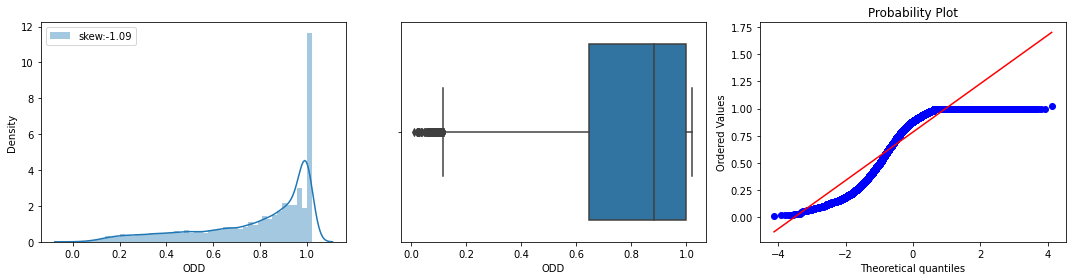

0.01    0.142566
0.02    0.178125
0.03    0.208188
0.04    0.234392
0.25    0.645110
0.50    0.880441
0.90    1.000000
0.95    1.000000
0.96    1.000000
0.97    1.000000
0.98    1.000000
0.99    1.000000
1.00    1.020475
Name: ODD, dtype: float64


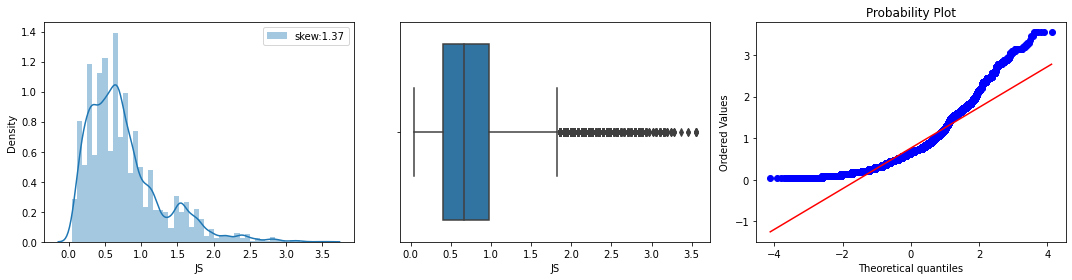

0.01    0.088679
0.02    0.133019
0.03    0.133019
0.04    0.133019
0.25    0.399056
0.50    0.665093
0.90    1.551884
0.95    1.773582
0.96    1.862261
0.97    1.995280
0.98    2.216978
0.99    2.483015
1.00    3.547164
Name: JS, dtype: float64


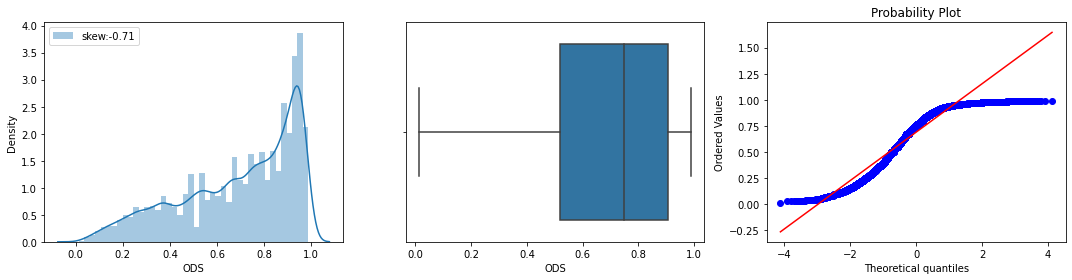

0.01    0.104478
0.02    0.142857
0.03    0.175096
0.04    0.200000
0.25    0.518519
0.50    0.750000
0.90    0.952381
0.95    0.964286
0.96    0.971429
0.97    0.972222
0.98    0.974359
0.99    0.978261
1.00    0.987654
Name: ODS, dtype: float64


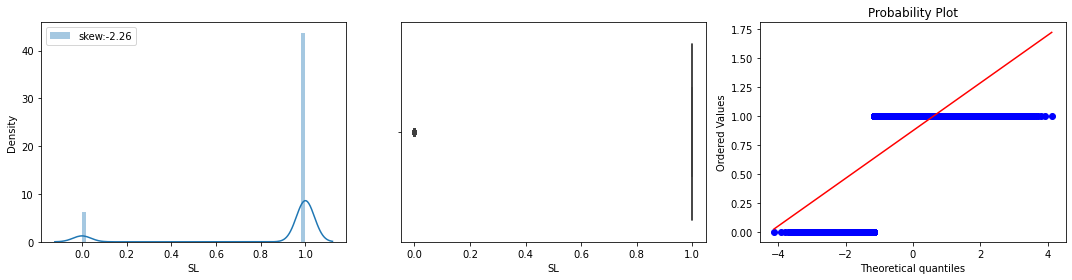

0.01    0.0
0.02    0.0
0.03    0.0
0.04    0.0
0.25    1.0
0.50    1.0
0.90    1.0
0.95    1.0
0.96    1.0
0.97    1.0
0.98    1.0
0.99    1.0
1.00    1.0
Name: SL, dtype: float64


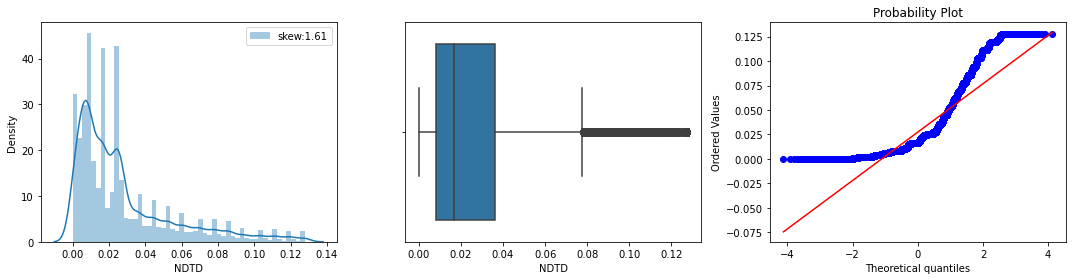

0.01    0.000000
0.02    0.000139
0.03    0.001124
0.04    0.001467
0.25    0.008318
0.50    0.016666
0.90    0.069423
0.95    0.088239
0.96    0.094434
0.97    0.102756
0.98    0.111082
0.99    0.119424
1.00    0.127794
Name: NDTD, dtype: float64


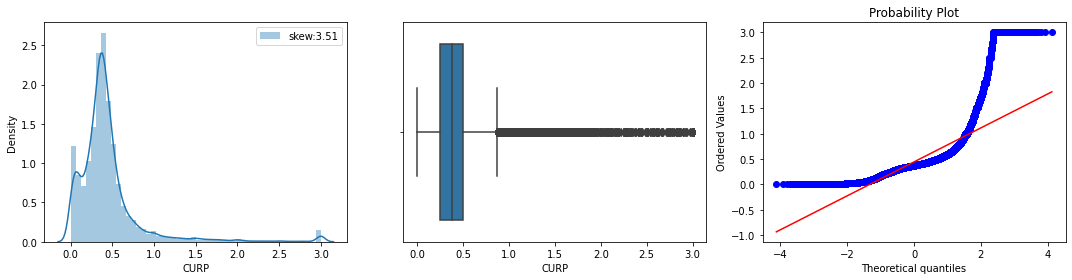

0.01    0.010000
0.02    0.018456
0.03    0.025000
0.04    0.032520
0.25    0.254237
0.50    0.375000
0.90    0.750000
0.95    1.100000
0.96    1.263298
0.97    1.500000
0.98    1.833333
0.99    2.750000
1.00    3.000000
Name: CURP, dtype: float64


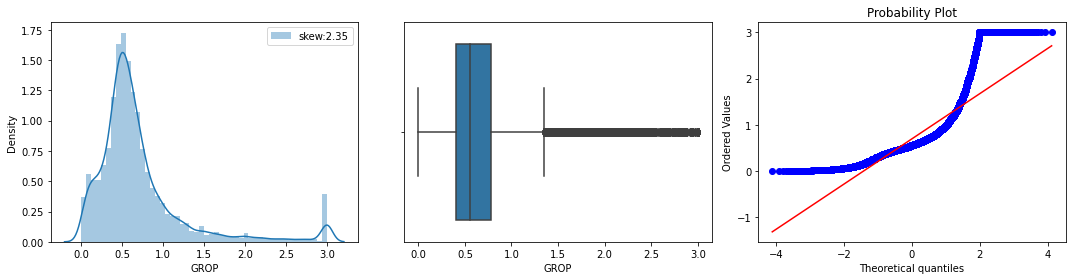

0.01    0.034884
0.02    0.055711
0.03    0.072072
0.04    0.090909
0.25    0.404762
0.50    0.556522
0.90    1.263158
0.95    1.933333
0.96    2.176471
0.97    2.600000
0.98    3.000000
0.99    3.000000
1.00    3.000000
Name: GROP, dtype: float64


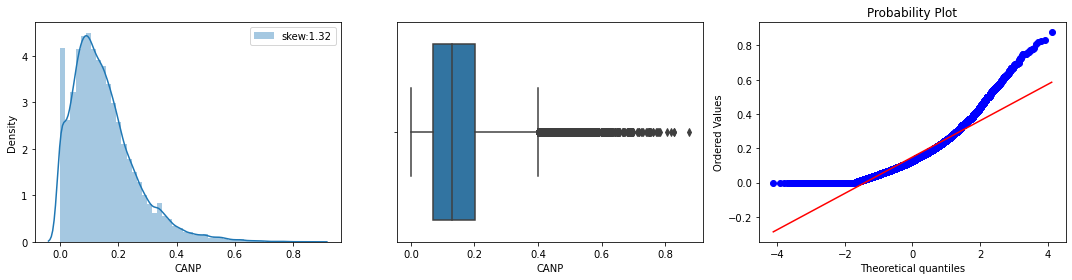

0.01    0.000000
0.02    0.000000
0.03    0.000000
0.04    0.000000
0.25    0.070621
0.50    0.128415
0.90    0.293758
0.95    0.360000
0.96    0.378378
0.97    0.409091
0.98    0.452381
0.99    0.522325
1.00    0.876289
Name: CANP, dtype: float64


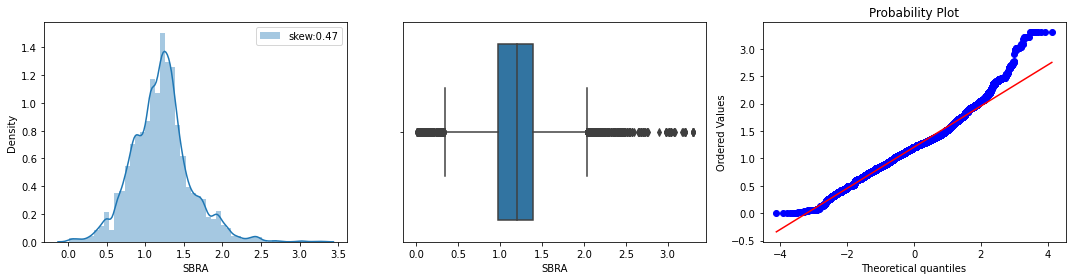

0.01    0.354723
0.02    0.451349
0.03    0.505010
0.04    0.586473
0.25    0.970609
0.50    1.204004
0.90    1.684181
0.95    1.895363
0.96    1.931261
0.97    1.982676
0.98    2.066433
0.99    2.286349
1.00    3.297663
Name: SBRA, dtype: float64


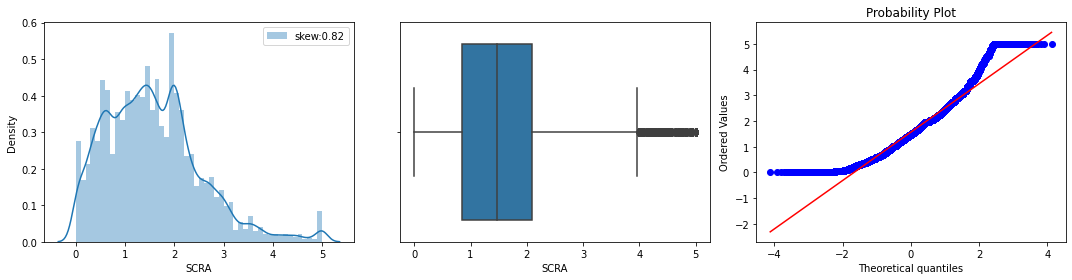

0.01    0.011845
0.02    0.052260
0.03    0.110717
0.04    0.169961
0.25    0.844169
0.50    1.474290
0.90    2.796231
0.95    3.280577
0.96    3.502298
0.97    3.701504
0.98    4.138150
0.99    4.725287
1.00    5.000000
Name: SCRA, dtype: float64


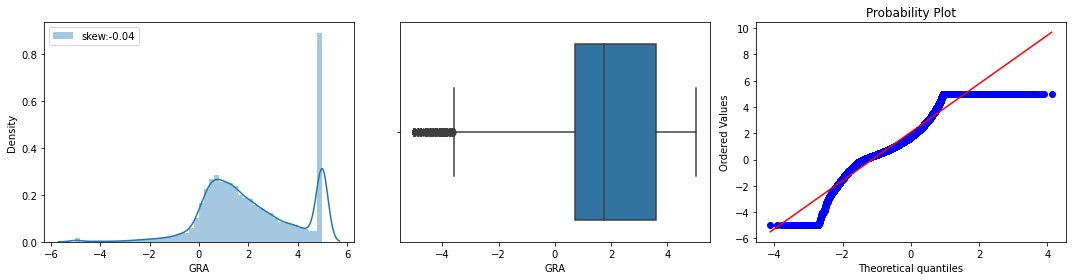

0.01   -2.572223
0.02   -1.641047
0.03   -1.090640
0.04   -0.733634
0.25    0.718988
0.50    1.733357
0.90    5.000000
0.95    5.000000
0.96    5.000000
0.97    5.000000
0.98    5.000000
0.99    5.000000
1.00    5.000000
Name: GRA, dtype: float64


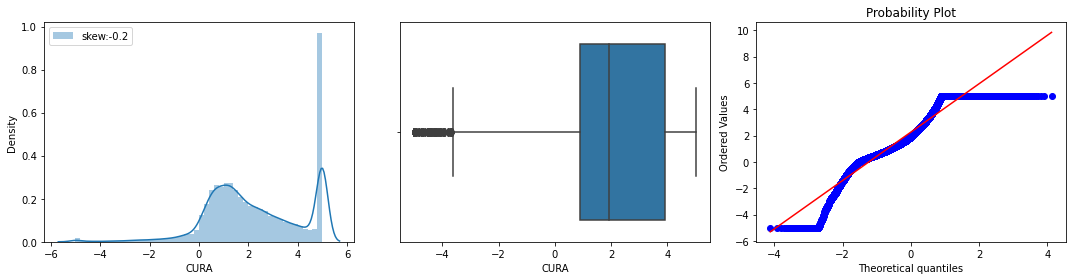

0.01   -2.758790
0.02   -1.667858
0.03   -0.983278
0.04   -0.580249
0.25    0.894549
0.50    1.940815
0.90    5.000000
0.95    5.000000
0.96    5.000000
0.97    5.000000
0.98    5.000000
0.99    5.000000
1.00    5.000000
Name: CURA, dtype: float64


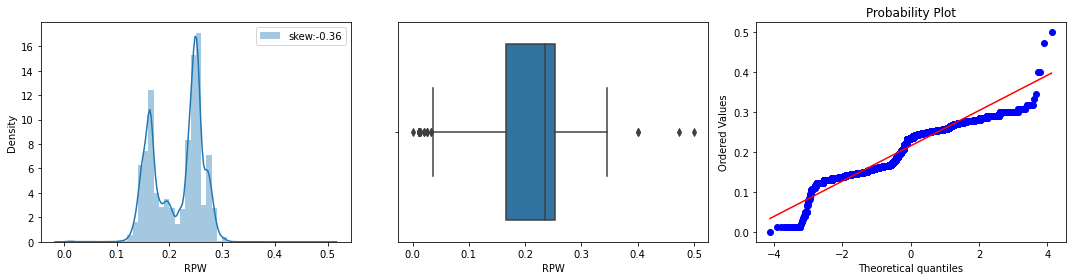

0.01    0.130778
0.02    0.136613
0.03    0.141731
0.04    0.143870
0.25    0.165534
0.50    0.234643
0.90    0.270086
0.95    0.277710
0.96    0.278101
0.97    0.280196
0.98    0.285433
0.99    0.289178
1.00    0.500000
Name: RPW, dtype: float64


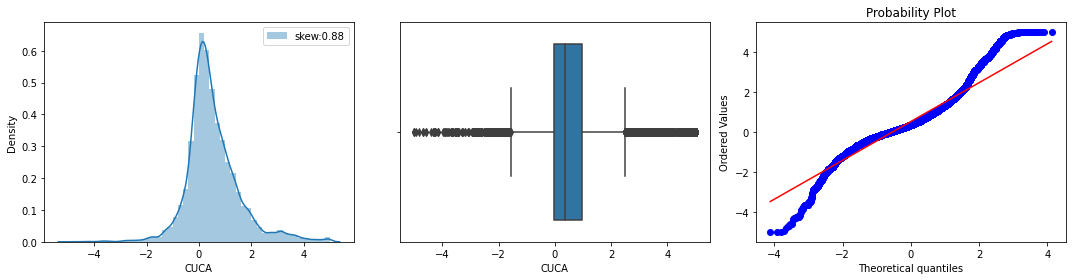

0.01   -1.766793
0.02   -1.283438
0.03   -1.050785
0.04   -0.895843
0.25   -0.040932
0.50    0.354118
0.90    1.735559
0.95    2.382256
0.96    2.735394
0.97    3.069470
0.98    3.394811
0.99    3.881027
1.00    5.000000
Name: CUCA, dtype: float64


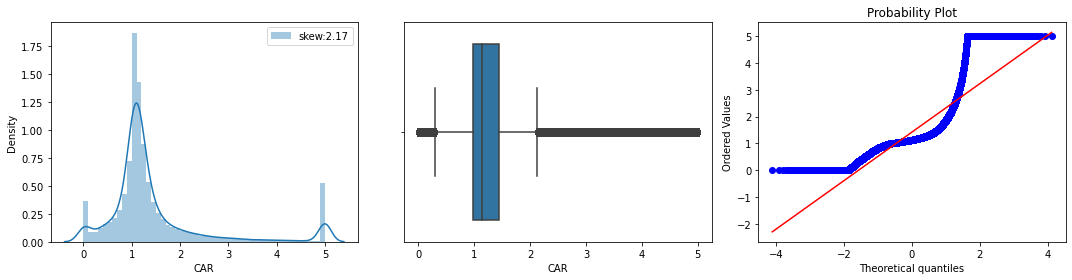

0.01    0.000000
0.02    0.000000
0.03    0.000000
0.04    0.138652
0.25    0.984103
0.50    1.129500
0.90    2.563808
0.95    5.000000
0.96    5.000000
0.97    5.000000
0.98    5.000000
0.99    5.000000
1.00    5.000000
Name: CAR, dtype: float64


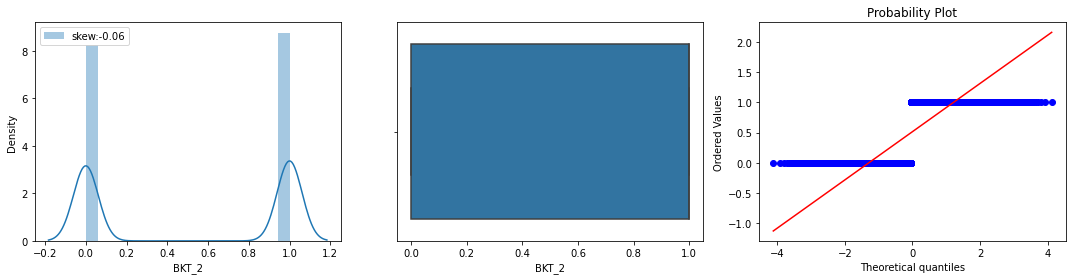

0.01    0.0
0.02    0.0
0.03    0.0
0.04    0.0
0.25    0.0
0.50    1.0
0.90    1.0
0.95    1.0
0.96    1.0
0.97    1.0
0.98    1.0
0.99    1.0
1.00    1.0
Name: BKT_2, dtype: float64


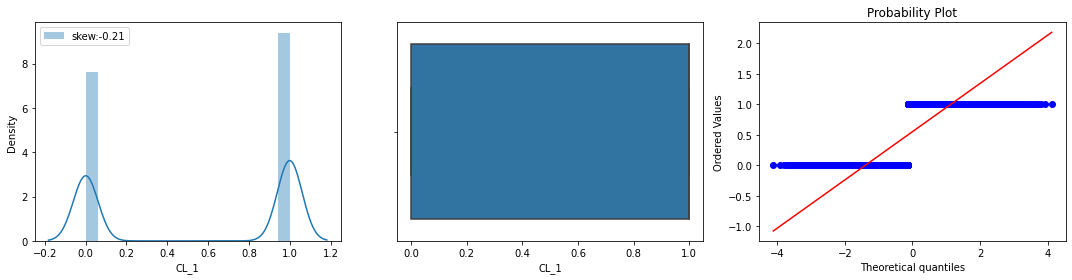

0.01    0.0
0.02    0.0
0.03    0.0
0.04    0.0
0.25    0.0
0.50    1.0
0.90    1.0
0.95    1.0
0.96    1.0
0.97    1.0
0.98    1.0
0.99    1.0
1.00    1.0
Name: CL_1, dtype: float64


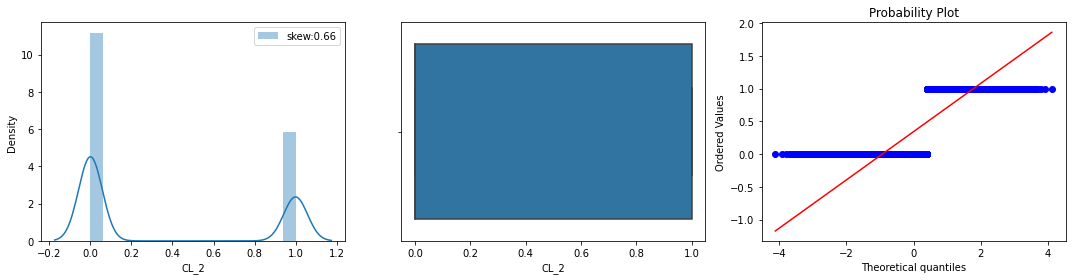

0.01    0.0
0.02    0.0
0.03    0.0
0.04    0.0
0.25    0.0
0.50    0.0
0.90    1.0
0.95    1.0
0.96    1.0
0.97    1.0
0.98    1.0
0.99    1.0
1.00    1.0
Name: CL_2, dtype: float64


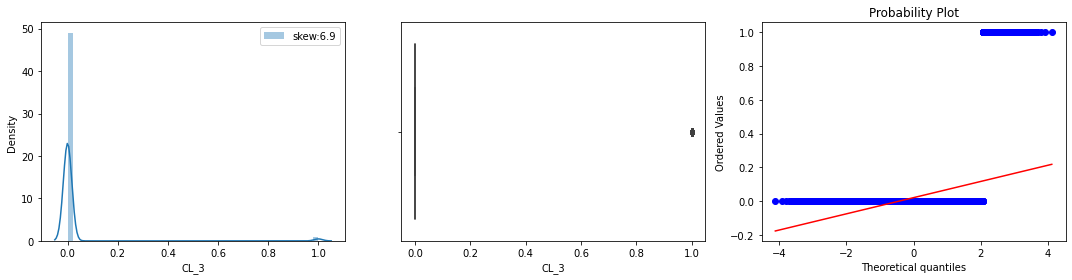

0.01    0.0
0.02    0.0
0.03    0.0
0.04    0.0
0.25    0.0
0.50    0.0
0.90    0.0
0.95    0.0
0.96    0.0
0.97    0.0
0.98    0.0
0.99    1.0
1.00    1.0
Name: CL_3, dtype: float64


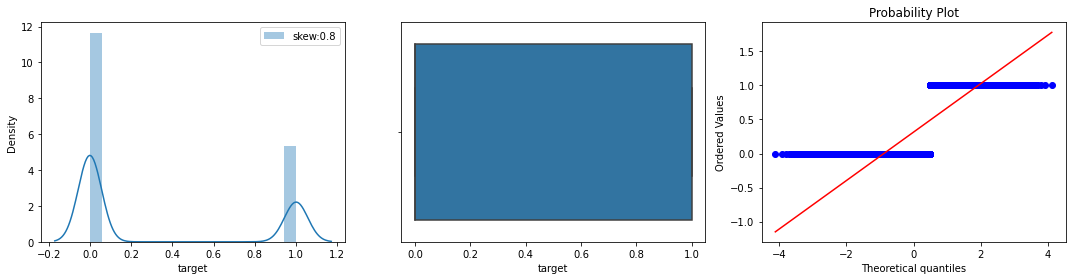

0.01    0.0
0.02    0.0
0.03    0.0
0.04    0.0
0.25    0.0
0.50    0.0
0.90    1.0
0.95    1.0
0.96    1.0
0.97    1.0
0.98    1.0
0.99    1.0
1.00    1.0
Name: target, dtype: float64


In [18]:
for column_names in num_columns:
        
        plt.figure(figsize=(15,4))
        plt.subplot(131)
        sns.distplot(raw_data_numeric_fe[f'{column_names}'], label='skew:' + str(np.round(raw_data_numeric_fe[f'{column_names}'].skew(),2)))
        plt.legend()
        
        plt.subplot(132)
        sns.boxplot(raw_data_numeric_fe[f'{column_names}'])
        
        plt.subplot(133)
        stats.probplot(raw_data_numeric_fe[f'{column_names}'], plot=plt)
        
        plt.tight_layout()
        plt.show()
        
        print(raw_data_numeric_fe[f'{column_names}'].quantile([0.01,0.02,0.03,0.04, 0.25, 0.5, 0.9,0.95,0.96,0.97,0.98,0.99,1.0]))

#### from the distributions and the percentile data it does not look that the data has any outlier

## Check nulls and draw possible wayouts

In [19]:
raw_data_numeric_fe.isnull().sum()

pk        0
GRCA      0
CCA       0
JD        0
ODD       0
JS        0
ODS       0
SL        0
NDTD      0
CURP      0
GROP      0
CANP      0
SBRA      0
SCRA      0
GRA       0
CURA      0
RPW       0
CUCA      0
CAR       0
BKT_2     0
CL_1      0
CL_2      0
CL_3      0
target    0
dtype: int64

### in case there is any null value, let's make a wrangling technique to replace it by it's median

In [20]:
# replace null values of numeric fields with its median value
for columns in num_columns:
    if raw_data_numeric_fe[columns].isnull().sum()>1:
        raw_data_numeric_fe[columns].fillna(raw_data_numeric_fe[columns].median(), inplace=True)

## labelEncode the categorical column

In [21]:
cat_columns

['QT']

In [22]:
# label encoding the categorical features
le = LabelEncoder()
raw_data_categorical_fe = raw_data_categorical_fe[cat_columns].apply(le.fit_transform)
raw_data_categorical_fe.head()

,QT
0,0
1,0
2,0
3,0
4,0


In [23]:
raw_data_categorical_fe.QT.value_counts()

0    26576
2     6648
1     3551
Name: QT, dtype: int64

## Merge Features

In [24]:
cleaned_data = pd.concat([raw_data_numeric_fe, raw_data_categorical_fe], axis=1)

In [25]:
cleaned_data.head()

,pk,GRCA,CCA,JD,ODD,JS,ODS,SL,NDTD,CURP,GROP,CANP,SBRA,SCRA,GRA,CURA,RPW,CUCA,CAR,BKT_2,CL_1,CL_2,CL_3,target,QT
0,88315053602,1.400436,0.610522,0.667146,0.930870,0.709433,0.800000,1,0.016290,0.204678,0.409357,0.167464,1.000539,0.919474,1.341754,1.820791,0.280196,-0.007556,1.091054,0,0,1,0,0,0
1,88315053603,1.400436,0.610522,0.667146,0.930870,0.709433,0.800000,1,0.024623,0.216374,0.409357,0.157895,1.000539,0.919474,1.999409,3.810137,0.276128,-0.007556,1.143376,0,0,1,0,0,0
2,88314793081,0.728882,0.524062,1.365898,0.885873,1.463205,0.767442,0,0.004357,0.089888,0.101124,0.010204,0.196907,0.003487,0.618700,0.742814,0.278101,0.435419,5.000000,0,0,0,0,0,0
3,88312760631,5.000000,5.000000,0.298977,0.764192,0.354716,0.800000,0,0.003798,0.314147,0.328710,0.010960,0.678897,0.148338,1.117669,1.079367,0.266220,0.091167,5.000000,1,0,0,0,1,0
4,88312449843,0.614226,0.389327,0.699606,0.917133,1.108489,0.862069,1,0.024571,0.253333,0.560000,0.227723,1.621770,2.129082,4.393867,5.000000,0.277710,2.103696,1.454895,1,0,1,0,0,0


## Taking the 'pk' column out as it's a id to map

In [26]:
cleaned_data_fe = cleaned_data.drop(['pk'], axis=1)
cleaned_data_pk = cleaned_data['pk']

In [27]:
cleaned_data_pk.head()

0    88315053602
1    88315053603
2    88314793081
3    88312760631
4    88312449843
Name: pk, dtype: int64

In [28]:
cleaned_data_fe.head()

,GRCA,CCA,JD,ODD,JS,ODS,SL,NDTD,CURP,GROP,CANP,SBRA,SCRA,GRA,CURA,RPW,CUCA,CAR,BKT_2,CL_1,CL_2,CL_3,target,QT
0,1.400436,0.610522,0.667146,0.930870,0.709433,0.800000,1,0.016290,0.204678,0.409357,0.167464,1.000539,0.919474,1.341754,1.820791,0.280196,-0.007556,1.091054,0,0,1,0,0,0
1,1.400436,0.610522,0.667146,0.930870,0.709433,0.800000,1,0.024623,0.216374,0.409357,0.157895,1.000539,0.919474,1.999409,3.810137,0.276128,-0.007556,1.143376,0,0,1,0,0,0
2,0.728882,0.524062,1.365898,0.885873,1.463205,0.767442,0,0.004357,0.089888,0.101124,0.010204,0.196907,0.003487,0.618700,0.742814,0.278101,0.435419,5.000000,0,0,0,0,0,0
3,5.000000,5.000000,0.298977,0.764192,0.354716,0.800000,0,0.003798,0.314147,0.328710,0.010960,0.678897,0.148338,1.117669,1.079367,0.266220,0.091167,5.000000,1,0,0,0,1,0
4,0.614226,0.389327,0.699606,0.917133,1.108489,0.862069,1,0.024571,0.253333,0.560000,0.227723,1.621770,2.129082,4.393867,5.000000,0.277710,2.103696,1.454895,1,0,1,0,0,0


In [29]:
cleaned_data_fe.shape

(36775, 24)

<AxesSubplot:>

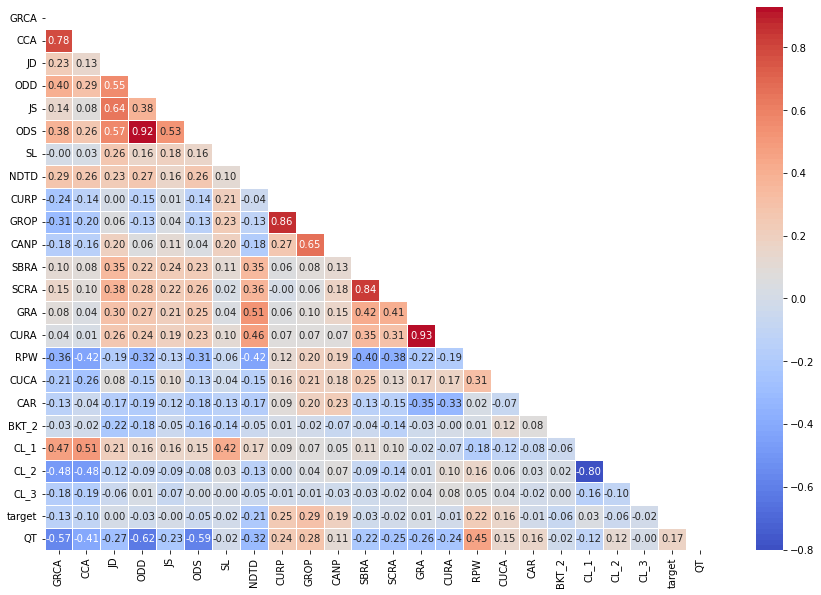

In [30]:
#checking correlations
plt.figure(figsize=(15, 10))
cmap = sns.color_palette("coolwarm",100)
corr = cleaned_data_fe.corr()
mask = np.triu(corr)
sns.heatmap(corr, annot=True, cmap=cmap, fmt = '1.2f' , square=False, mask=mask, linewidths = .6)

In [31]:
X = cleaned_data_fe.drop(['target'], axis=1)
Y = cleaned_data_fe['target']

In [32]:
X.shape, Y.shape

((36775, 23), (36775,))

In [158]:
X.head()

,GRCA,CCA,JD,ODD,JS,ODS,SL,NDTD,CURP,GROP,CANP,SBRA,SCRA,GRA,CURA,RPW,CUCA,CAR,BKT_2,CL_1,CL_2,CL_3,QT
0,1.400436,0.610522,0.667146,0.930870,0.709433,0.800000,1,0.016290,0.204678,0.409357,0.167464,1.000539,0.919474,1.341754,1.820791,0.280196,-0.007556,1.091054,0,0,1,0,0
1,1.400436,0.610522,0.667146,0.930870,0.709433,0.800000,1,0.024623,0.216374,0.409357,0.157895,1.000539,0.919474,1.999409,3.810137,0.276128,-0.007556,1.143376,0,0,1,0,0
2,0.728882,0.524062,1.365898,0.885873,1.463205,0.767442,0,0.004357,0.089888,0.101124,0.010204,0.196907,0.003487,0.618700,0.742814,0.278101,0.435419,5.000000,0,0,0,0,0
3,5.000000,5.000000,0.298977,0.764192,0.354716,0.800000,0,0.003798,0.314147,0.328710,0.010960,0.678897,0.148338,1.117669,1.079367,0.266220,0.091167,5.000000,1,0,0,0,0
4,0.614226,0.389327,0.699606,0.917133,1.108489,0.862069,1,0.024571,0.253333,0.560000,0.227723,1.621770,2.129082,4.393867,5.000000,0.277710,2.103696,1.454895,1,0,1,0,0


## Scaling the data

In [169]:
X.select_dtypes(include='float64').columns

Index(['GRCA', 'CCA', 'JD', 'ODD', 'JS', 'ODS', 'NDTD', 'CURP', 'GROP', 'CANP',
       'SBRA', 'SCRA', 'GRA', 'CURA', 'RPW', 'CUCA', 'CAR'],
      dtype='object')

In [173]:
X.select_dtypes(exclude='float64').columns

Index(['SL', 'BKT_2', 'CL_1', 'CL_2', 'CL_3', 'QT'], dtype='object')

In [174]:
stansdardscaler = StandardScaler()
cleaned_data_scaled = pd.DataFrame(standardscaler.fit_transform(X.select_dtypes(include='float64')),
                                  columns=X.select_dtypes(include='float64').columns)

In [175]:
cleaned_data_scaled.head()

,GRCA,CCA,JD,ODD,JS,ODS,NDTD,CURP,GROP,CANP,SBRA,SCRA,GRA,CURA,RPW,CUCA,CAR
0,-0.438970,-1.075684,-0.402406,0.604529,-0.108137,0.454113,-0.403607,-0.587131,-0.510297,0.165617,-0.542796,-0.674599,-0.391719,-0.232477,1.391005,-0.532780,-0.310072
1,-0.438970,-1.075684,-0.402406,0.604529,-0.108137,0.454113,-0.100087,-0.558699,-0.510297,0.079242,-0.542796,-0.674599,-0.046326,0.813214,1.303318,-0.532780,-0.261131
2,-0.853381,-1.130189,1.005042,0.419794,1.348455,0.320431,-0.838227,-0.866179,-1.057283,-1.253839,-2.667296,-1.626714,-0.771459,-0.799111,1.345856,-0.094940,3.346331
3,1.782297,1.691458,-1.143983,-0.079759,-0.793593,0.454113,-0.858595,-0.321019,-0.653411,-1.247013,-1.393095,-1.476149,-0.509406,-0.622203,1.089770,-0.435201,3.346331
4,-0.924135,-1.215126,-0.337023,0.548133,0.663000,0.708965,-0.101981,-0.468853,-0.242967,0.709522,1.099506,0.582720,1.211217,1.438661,1.337426,1.553998,0.030263


In [176]:
cleaned_data_scaled = pd.concat([cleaned_data_scaled, X.select_dtypes(exclude='float64')], axis=1)

In [177]:
cleaned_data_scaled.shape

(36775, 23)

In [178]:
cleaned_data_scaled.head()

,GRCA,CCA,JD,ODD,JS,ODS,NDTD,CURP,GROP,CANP,SBRA,SCRA,GRA,CURA,RPW,CUCA,CAR,SL,BKT_2,CL_1,CL_2,CL_3,QT
0,-0.438970,-1.075684,-0.402406,0.604529,-0.108137,0.454113,-0.403607,-0.587131,-0.510297,0.165617,-0.542796,-0.674599,-0.391719,-0.232477,1.391005,-0.532780,-0.310072,1,0,0,1,0,0
1,-0.438970,-1.075684,-0.402406,0.604529,-0.108137,0.454113,-0.100087,-0.558699,-0.510297,0.079242,-0.542796,-0.674599,-0.046326,0.813214,1.303318,-0.532780,-0.261131,1,0,0,1,0,0
2,-0.853381,-1.130189,1.005042,0.419794,1.348455,0.320431,-0.838227,-0.866179,-1.057283,-1.253839,-2.667296,-1.626714,-0.771459,-0.799111,1.345856,-0.094940,3.346331,0,0,0,0,0,0
3,1.782297,1.691458,-1.143983,-0.079759,-0.793593,0.454113,-0.858595,-0.321019,-0.653411,-1.247013,-1.393095,-1.476149,-0.509406,-0.622203,1.089770,-0.435201,3.346331,0,1,0,0,0,0
4,-0.924135,-1.215126,-0.337023,0.548133,0.663000,0.708965,-0.101981,-0.468853,-0.242967,0.709522,1.099506,0.582720,1.211217,1.438661,1.337426,1.553998,0.030263,1,1,0,1,0,0


In [180]:
Default_indep=X
VIF=[]

features=list(Default_indep.columns)
for i in range(1, len(Default_indep.columns)):
    x=Default_indep.loc[:,Default_indep.columns!=features[i]]
    y=Default_indep.loc[:,Default_indep.columns==features[i]]
    model=sm.OLS(y,x)
    results=model.fit()

    rsq=results.rsquared
    vif=round(1/(1-rsq),2)
    print ("Feature {} | R-sqr is {} | VIF is {}".format(features[i],rsq,vif))
    VIF.append(vif)

Feature CCA | R-sqr is 0.8922229206103245 | VIF is 9.28
Feature JD | R-sqr is 0.902793668001979 | VIF is 10.29
Feature ODD | R-sqr is 0.9891973639930077 | VIF is 92.57
Feature JS | R-sqr is 0.8639732657449377 | VIF is 7.35
Feature ODS | R-sqr is 0.9873866024893287 | VIF is 79.28
Feature SL | R-sqr is 0.9630919387300525 | VIF is 27.09
Feature NDTD | R-sqr is 0.7414538794837917 | VIF is 3.87
Feature CURP | R-sqr is 0.9571923635529924 | VIF is 23.36
Feature GROP | R-sqr is 0.9782099322894777 | VIF is 45.89
Feature CANP | R-sqr is 0.9388933367723561 | VIF is 16.36
Feature SBRA | R-sqr is 0.9764509000937225 | VIF is 42.46
Feature SCRA | R-sqr is 0.937710095934574 | VIF is 16.05
Feature GRA | R-sqr is 0.9586410296167477 | VIF is 24.18
Feature CURA | R-sqr is 0.9550599334507913 | VIF is 22.25
Feature RPW | R-sqr is 0.9517323427207361 | VIF is 20.72
Feature CUCA | R-sqr is 0.47507629851528665 | VIF is 1.91
Feature CAR | R-sqr is 0.7311535976541756 | VIF is 3.72
Feature BKT_2 | R-sqr is 0.57099

In [181]:
pca = PCA(n_components=23)
pca_fitted = pca.fit_transform(cleaned_data_scaled)
pca.get_covariance()

array([[ 1.00002719e+00,  7.78796768e-01,  2.29154315e-01,
         4.01008164e-01,  1.40834503e-01,  3.79610581e-01,
         2.85044239e-01, -2.40922326e-01, -3.08812214e-01,
        -1.78445888e-01,  9.88537185e-02,  1.52809731e-01,
         8.31881000e-02,  3.90676246e-02, -3.60749039e-01,
        -2.05166631e-01, -1.31929709e-01, -8.32774731e-04,
        -1.31960240e-02,  2.35540340e-01, -2.26326381e-01,
        -2.43633101e-02, -4.47029176e-01],
       [ 7.78796768e-01,  1.00002719e+00,  1.34820137e-01,
         2.92984619e-01,  7.81720203e-02,  2.64958723e-01,
         2.63022665e-01, -1.39535894e-01, -1.96851552e-01,
        -1.55742052e-01,  8.34831885e-02,  9.64624111e-02,
         4.25670896e-02,  1.16384601e-02, -4.22608040e-01,
        -2.56338523e-01, -4.29722665e-02,  9.44917062e-03,
        -1.14180510e-02,  2.52528976e-01, -2.28082918e-01,
        -2.70397117e-02, -3.23469064e-01],
       [ 2.29154315e-01,  1.34820137e-01,  1.00002719e+00,
         5.51832465e-01,  6.4

In [182]:
pca_fitted.shape

(36775, 23)

In [183]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.26831688, 0.16483033, 0.10277076, 0.08523064, 0.06810676,
       0.05610776, 0.04595033, 0.04009342, 0.0348313 , 0.02675789,
       0.01917372, 0.01832977, 0.01496477, 0.01241441, 0.01102023,
       0.00884733, 0.00796268, 0.00510284, 0.00320103, 0.00263009,
       0.00164471, 0.00137232, 0.00034002])

## Train Test Split

In [186]:
X_train, X_test, y_train, y_test = train_test_split(pca_fitted, Y, test_size = 0.30, random_state=20)

In [187]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25742, 23), (11033, 23), (25742,), (11033,))

## Instantiate model classes

In [201]:
lr = LogisticRegression()
dt = DecisionTreeClassifier(max_depth=20)
svm = SVC()
rf = RandomForestClassifier(max_depth=30, n_estimators=23, class_weight="balanced")

In [233]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

## fitting classification models

In [202]:
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=30, n_estimators=23)

In [234]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

## Training Scores

In [203]:
lr_score = lr.score(X_train,y_train)
dt_score = dt.score(X_train,y_train)
svm_score = svm.score(X_train,y_train)
rf_score = rf.score(X_train,y_train)
print('Training accuracy for logistic model:', lr_score)
print('Training accuracy for Decision Tree model:', dt_score)
print('Training accuracy for SVM model:', svm_score)
print('Training accuracy for Random Forest model:', rf_score)

Training accuracy for logistic model: 0.7457850982829617
Training accuracy for Decision Tree model: 0.9916478906067905
Training accuracy for SVM model: 0.8394841115686427
Training accuracy for Random Forest model: 0.9992230595913294


In [235]:
xgb_score = xgb.score(X_train,y_train)
print('Training accuracy for XGBoost model:', xgb_score)

Training accuracy for XGBoost model: 0.9583948411156864


In [204]:
from sklearn.model_selection import cross_val_score, cross_val_predict

cv_lr_predict=cross_val_predict(lr,X_train,y_train,cv=5)
cv_dt_predict=cross_val_predict(dt,X_train,y_train,cv=5)
cv_svm_predict=cross_val_predict(svm,X_train,y_train,cv=5)
cv_rf_predict=cross_val_predict(rf,X_train,y_train,cv=5)

#Cross validation score-
cv_lr_score=cross_val_score(lr,X_train,y_train,cv=5)
cv_dt_score=cross_val_score(dt,X_train,y_train,cv=5)
cv_svm_score=cross_val_score(svm,X_train,y_train,cv=5)
cv_rf_score=cross_val_score(rf,X_train,y_train,cv=5)

print('logistics model cross val score :',np.average(cv_lr_score))
print('Decision Tree model cross val score :',np.average(cv_dt_score))
print('SVM model cross val score :',np.average(cv_svm_score))
print('Random Forest model cross val score :',np.average(cv_rf_score))

logistics model cross val score : 0.7460182973195209
Decision Tree model cross val score : 0.7723557640434705
SVM model cross val score : 0.8195167233232878
Random Forest model cross val score : 0.8441454598572486


In [237]:
cv_xgb_predict=cross_val_predict(xgb,X_train,y_train,cv=5)
cv_xgb_score=cross_val_score(xgb,X_train,y_train,cv=5)
print('Random Forest model cross val score :',np.average(cv_xgb_score))

Random Forest model cross val score : 0.8409989537878448


## Check ROC-AUC

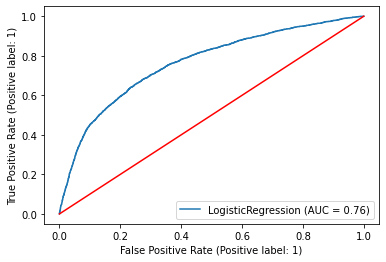

In [205]:
#for logistic model
plot_roc_curve(lr, X_test, y_test)
plt.plot([0,1], [0,1], c='r')

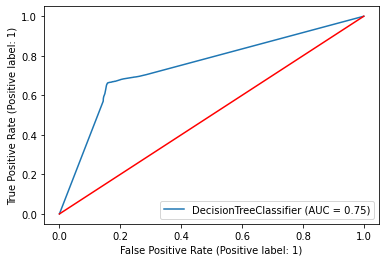

In [206]:
#for logistic model
plot_roc_curve(dt, X_test, y_test)
plt.plot([0,1], [0,1], c='r')

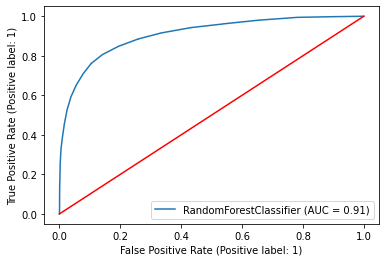

In [194]:
#for logistic model
plot_roc_curve(rf, X_test, y_test)
plt.plot([0,1], [0,1], c='r')

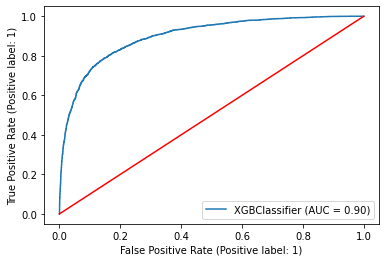

In [238]:
#for xgboost model
plot_roc_curve(xgb, X_test, y_test)
plt.plot([0,1], [0,1], c='r')

## Classification Scores

In [207]:
from sklearn.metrics import classification_report

In [239]:
lr_scores=classification_report(y_train,cv_lr_predict)
dt_scores=classification_report(y_train,cv_dt_predict)
svm_scores=classification_report(y_train,cv_svm_predict)
rf_scores=classification_report(y_train,cv_rf_predict)
xgb_scores=classification_report(y_train,cv_xgb_predict)
print('Logistic Regression--------------------------------->')
print(lr_scores)
print('Decision Tree--------------------------------------->')
print(dt_scores)
print('SVM------------------------------------------------->')
print(svm_scores)
print('Random Forest--------------------------------------->')
print(rf_scores)
print('XGBoost--------------------------------------------->')
print(xgb_scores)

Logistic Regression--------------------------------->
              precision    recall  f1-score   support

           0       0.76      0.93      0.83     17589
           1       0.69      0.36      0.47      8153

    accuracy                           0.75     25742
   macro avg       0.72      0.64      0.65     25742
weighted avg       0.74      0.75      0.72     25742

Decision Tree--------------------------------------->
              precision    recall  f1-score   support

           0       0.83      0.83      0.83     17589
           1       0.64      0.64      0.64      8153

    accuracy                           0.77     25742
   macro avg       0.74      0.74      0.74     25742
weighted avg       0.77      0.77      0.77     25742

SVM------------------------------------------------->
              precision    recall  f1-score   support

           0       0.83      0.93      0.88     17589
           1       0.79      0.58      0.67      8153

    accuracy        

## Plotting confusion matrix

Text(0.5, 1.0, 'Logistics Regression Confusion Matrix')

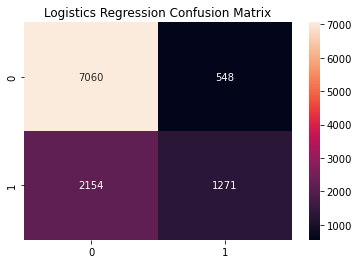

In [219]:
cm = metrics.confusion_matrix(y_test, lr.predict(X_test))
sns.heatmap(cm, annot=True, fmt='1')
plt.title('Logistics Regression Confusion Matrix')

Text(0.5, 1.0, 'Random Forest Confusion Matrix')

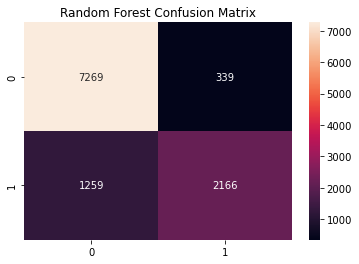

In [220]:
cm = metrics.confusion_matrix(y_test, rf.predict(X_test))
sns.heatmap(cm, annot=True, fmt='1')
plt.title('Random Forest Confusion Matrix')

Text(0.5, 1.0, 'XGBoost Confusion Matrix')

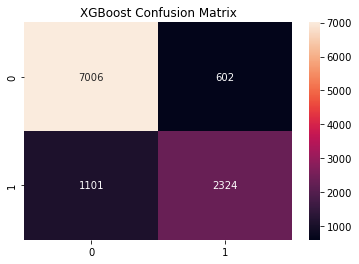

In [240]:
cm = metrics.confusion_matrix(y_test, xgb.predict(X_test))
sns.heatmap(cm, annot=True, fmt='1')
plt.title('XGBoost Confusion Matrix')

## Plotting Precision Recall Curve

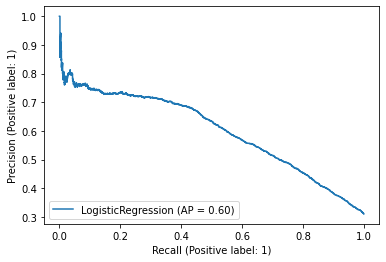

In [198]:
# for logistic model
plot_precision_recall_curve(lr, X_test, y_test)

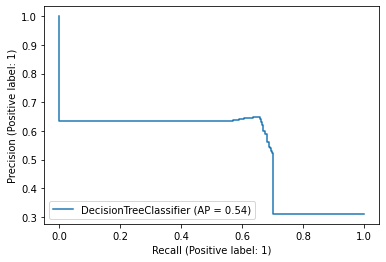

In [199]:
# for decision tree
plot_precision_recall_curve(dt, X_test, y_test)

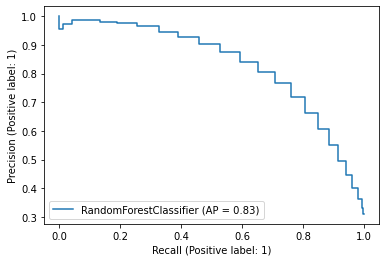

In [200]:
# for random forest
plot_precision_recall_curve(rf, X_test, y_test)

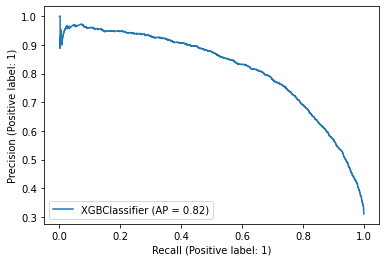

In [241]:
# for xgboost forest
plot_precision_recall_curve(xgb, X_test, y_test)

## Apply Stratified K-Fold

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
skf

lr = LogisticRegression()
svm = SVC()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()

def get_kfold_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

scores_lr = []
scores_rf = []
scores_svm = []
scores_dt = []

for train_index, test_index in skf.split(pca_fitted, y):
    X_train, X_test, y_train, y_test = pca_fitted[train_index], pca_fitted[test_index], \
                                       y.iloc[train_index], y.iloc[test_index]
    scores_lr.append(get_kfold_score(lr, X_train, X_test, y_train, y_test))
    scores_rf.append(get_kfold_score(rf, X_train, X_test, y_train, y_test))
    scores_svm.append(get_kfold_score(svm, X_train, X_test, y_train, y_test))
    scores_dt.append(get_kfold_score(dt, X_train, X_test, y_train, y_test))

scores_lr

scores_rf

scores_svm

scores_dt

## Checking Crossval Scores

cross_val_score(LogisticRegression(), \
                X, y, cv=10)

cross_val_score(SVC(gamma='auto'), \
                X, y, cv=10)

cross_val_score(RandomForestClassifier(n_estimators=100),
                X, y, cv=20)

## Build Testing Pipeline

In [242]:
def wrangle_data(df):
    df_numeric_fe = df.select_dtypes(exclude=['object'])
    df_categorical_fe = df.select_dtypes(include=['object'])

    num_columns = df_numeric_fe.columns.values.tolist()
    cat_columns = df_categorical_fe.columns.values.tolist()

    for columns in num_columns:
        if df_numeric_fe[columns].isnull().sum()>1:
            df_numeric_fe[columns].fillna(df_numeric_fe[columns].median(), inplace=True)

    le = LabelEncoder()
    df_categorical_fe = df_categorical_fe[cat_columns].apply(le.fit_transform)

    cleaned_data = pd.concat([df_numeric_fe, df_categorical_fe], axis=1)

    df_fe = cleaned_data.drop(['pk'], axis=1)
    df_pk = cleaned_data['pk']

    df_scaled = pd.DataFrame(standardscaler.fit_transform(df_fe.select_dtypes(include='float64')),
                                  columns=df_fe.select_dtypes(include='float64').columns)
 
    df_scaled = pd.concat([df_scaled, df_fe.select_dtypes(exclude='float64')], axis=1)

    pca = PCA(n_components=23)
    model_feed = pca.fit_transform(df_scaled)
    
    return model_feed, df_pk

## import test data

In [243]:
test_data = pd.read_csv('Railofy_testing_data_for_model.csv')

In [244]:
test_data.shape

(3847, 24)

In [245]:
test_data.head()

,pk,QT,GRCA,CCA,JD,ODD,JS,ODS,SL,NDTD,CURP,GROP,CANP,SBRA,SCRA,GRA,CURA,RPW,CUCA,CAR,BKT_2,CL_1,CL_2,CL_3
0,8831606085,GN,0.065517,0.041589,1.614476,1.000000,1.773582,0.975610,1,0.008326,0.375000,0.625000,0.153846,0.812225,0.058562,0.705277,1.457012,0.280196,1.335478,1.692308,0,0,0,1
1,8831561565,GN,2.710786,1.658815,0.927683,0.836028,0.665093,0.681818,1,0.013590,0.299094,0.368580,0.064789,0.465469,0.119819,-0.323278,-0.195543,0.276128,-0.537617,1.629686,0,1,0,0
2,8831539811,GN,3.365960,1.514607,1.546139,0.961232,1.418866,0.888889,1,0.008322,0.493917,0.688564,0.140845,0.533070,0.200964,0.305956,0.328951,0.276128,-0.093347,1.116554,0,1,0,0
3,8831313791,GN,2.342250,1.277346,0.990041,1.000000,0.842451,0.950000,1,0.007728,0.440559,0.695804,0.195710,1.078635,1.082519,0.446952,0.494185,0.271758,0.069792,1.442885,0,1,0,0
4,8831070109,GN,0.139225,0.054502,1.575182,0.817376,2.571694,0.773333,1,0.024999,0.411765,1.176471,0.419355,1.285086,1.975081,3.847262,3.497138,0.267730,1.296174,1.372434,0,0,1,0


## wrangle test data and feed to model

In [246]:
model_feed, df_pk = wrangle_data(test_data)

In [247]:
df_pk.shape, model_feed.shape

((3847,), (3847, 23))

In [248]:
predicted_df = xgb.predict(model_feed)

In [249]:
predicted_df

array([0, 1, 1, ..., 0, 1, 1])

In [250]:
lr.predict_proba(model_feed)

array([[0.80397676, 0.19602324],
       [0.30486468, 0.69513532],
       [0.30114566, 0.69885434],
       ...,
       [0.81642933, 0.18357067],
       [0.4780809 , 0.5219191 ],
       [0.74664546, 0.25335454]])

## Make submission file

In [251]:
prediction = pd.DataFrame()
prediction['pk'] = df_pk.tolist()
prediction['target'] = predicted_df.tolist()

In [252]:
prediction.head(10)

,pk,target
0,8831606085,0
1,8831561565,1
2,8831539811,1
3,8831313791,0
4,8831070109,0
5,8831052568,0
6,8831031956,0
7,8830976883,0
8,8830940571,1
9,8830889723,1


In [253]:
prediction.to_csv('railways.csv', index=False)